<a href="https://colab.research.google.com/github/anup8898/Donald_Trump_Sppech/blob/main/Store_Score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np

In [ ]:
from google.colab import files 

In [ ]:
uploaded = files.upload()

Saving Test.csv to Test (1).csv
Saving Train.csv to Train (1).csv


In [ ]:
import io

In [ ]:

df = pd.read_csv(io.BytesIO(uploaded['Train.csv']))
X_test=pd.read_csv(io.BytesIO(uploaded['Test.csv']))

In [ ]:
df.head(10)

,Store_Ratio,Basket_Ratio,Category_1,Store_Score,Category_2,Store_Presence,Score_1,Score_2,Score_3,Score_4,time,popularity
0,0.407,0.00380,2,-35.865,1,0.9920,0.94400,0.0988,0.1100,113.911,189125,4
1,0.234,0.10500,0,-19.884,1,0.9440,0.90000,0.1290,0.0382,76.332,186513,4
2,0.668,0.72600,9,-7.512,1,0.0387,0.00000,0.1340,0.4530,124.075,172143,4
3,0.184,0.00561,4,-34.357,1,0.8490,0.93100,0.1110,0.0641,79.037,184000,5
4,0.231,0.13100,6,-22.842,1,0.9370,0.00000,0.1090,0.0677,109.560,186507,3
5,0.756,0.60900,3,-7.927,1,0.2170,0.00474,0.0960,0.5370,117.023,155720,4
6,0.398,0.03360,10,-30.369,1,0.9960,0.96200,0.1300,0.6120,72.166,134500,4
7,0.717,0.69900,5,-5.665,0,0.2230,0.00000,0.1390,0.6890,100.147,186600,4
8,0.419,0.57400,4,-12.221,0,0.1020,0.46200,0.8950,0.3450,129.260,685880,4
9,0.705,0.22100,3,-11.474,0,0.9380,0.90600,0.1110,0.3840,84.962,143131,4


In [ ]:
df.describe()

,Store_Ratio,Basket_Ratio,Category_1,Store_Score,Category_2,Store_Presence,Score_1,Score_2,Score_3,Score_4,time,popularity
count,18208.000000,18208.000000,18208.000000,18208.000000,18208.000000,18208.000000,18208.000000,18208.000000,18208.000000,18208.000000,1.820800e+04,18208.000000
mean,0.544283,0.483585,5.155536,-12.198086,0.648506,0.477702,0.322109,0.164888,0.421440,115.305776,2.180101e+05,3.850231
std,0.202709,0.302010,3.535068,8.370566,0.477450,0.380634,0.413493,0.136531,0.271922,31.478303,9.648289e+04,0.544226
min,0.000000,0.000216,0.000000,-47.576000,0.000000,0.000000,0.000000,0.011900,0.000000,0.000000,3.184400e+04,0.000000
25%,0.411000,0.200000,2.000000,-16.496250,0.000000,0.086175,0.000001,0.095300,0.184750,90.974250,1.696202e+05,4.000000
50%,0.573000,0.517000,5.000000,-9.166500,1.000000,0.430000,0.002245,0.112000,0.393000,114.022500,2.046460e+05,4.000000
75%,0.699000,0.742000,8.000000,-5.943750,1.000000,0.895000,0.859000,0.176000,0.640000,134.997000,2.471562e+05,4.000000
max,0.998000,1.000000,11.000000,-0.079000,1.000000,0.996000,1.000000,0.991000,0.999000,219.701000,3.908467e+06,5.000000


In [ ]:
df.dtypes

Store_Ratio       float64
Basket_Ratio      float64
Category_1          int64
Store_Score       float64
Category_2          int64
Store_Presence    float64
Score_1           float64
Score_2           float64
Score_3           float64
Score_4           float64
time                int64
popularity          int64
dtype: object

In [ ]:
df.Category_2.value_counts()

1    11808
0     6400
Name: Category_2, dtype: int64

In [ ]:
df.isnull().sum()
    

Store_Ratio       0
Basket_Ratio      0
Category_1        0
Store_Score       0
Category_2        0
Store_Presence    0
Score_1           0
Score_2           0
Score_3           0
Score_4           0
time              0
popularity        0
dtype: int64

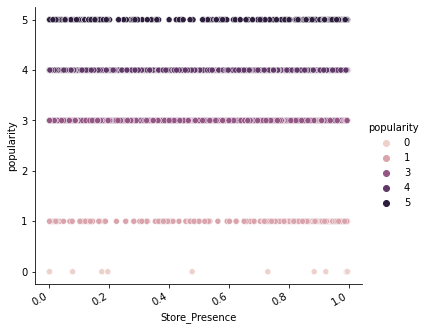

In [ ]:
g = sns.relplot(y="popularity", x="Store_Presence", kind="scatter", data=df,hue="popularity")
g.fig.autofmt_xdate()

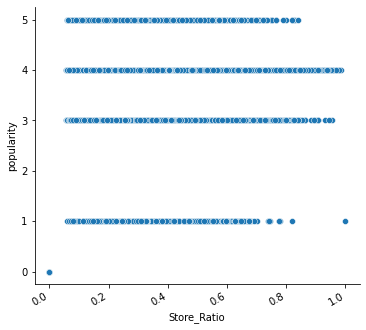

In [ ]:
g = sns.relplot(x="Store_Ratio", y="popularity", kind="scatter", data=df)
g.fig.autofmt_xdate()

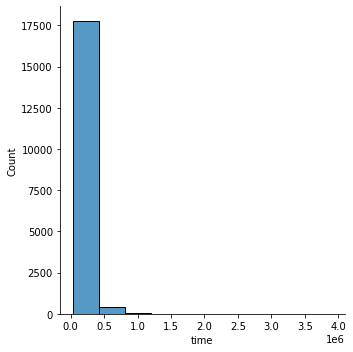

In [ ]:
sns.displot(data=df, x="time",bins=10)

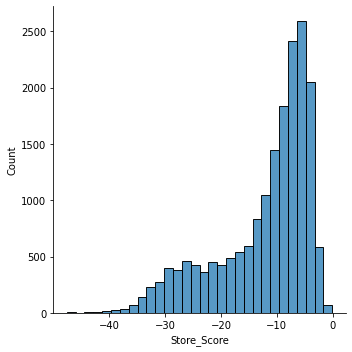

In [ ]:
sns.displot(data=df, x="Store_Score",bins=30)

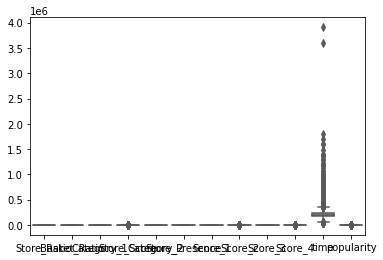

In [ ]:
sns.boxplot(data=df, orient="v", palette="Set2")

In [ ]:
Cheap=df.time<200000
df.Cheap



AttributeError: ignored

In [ ]:
df.iloc[(df['time']==Cheap)]

NotImplementedError: ignored

In [ ]:
s=df.loc[tim_]
score4=df.Score_4<50
sc=df.loc[(df['time']<300000 & df['Score_4']<-40)]

TypeError: ignored

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import IncrementalPCA
from sklearn.pipeline import make_pipeline

In [ ]:
neigh = KNeighborsClassifier

In [ ]:
X=df.drop(['popularity','time'],axis=1)

In [ ]:
y=df.popularity
y=y.astype('int')

In [ ]:
pcr = make_pipeline(StandardScaler(), IncrementalPCA(n_components=5))



In [ ]:
pcr.fit_transform(X,y)

array([[-3.87904615,  0.84951877,  0.16362527,  0.39668938, -0.10893665],
       [-3.36318718,  0.90346584,  1.01270443, -0.48509276, -0.74704917],
       [ 1.64890867,  0.00895659, -0.20589664, -0.03169042,  1.1924084 ],
       ...,
       [-3.8141268 , -1.01245559, -0.66973147, -0.73398008, -1.02496042],
       [ 1.38783435, -1.47407232,  2.12327189, -0.71644602, -1.55910545],
       [-0.57223214,  1.1405165 ,  0.43446499, -0.70797625, -0.25144237]])

In [ ]:
knn=KNeighborsClassifier(n_neighbors=8,p=2)

In [ ]:
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

In [ ]:
y_true__=knn.predict_proba(X)

In [ ]:
from sklearn.metrics import log_loss

In [ ]:
log_loss(y,y_true__)

0.33081538695575907

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
y_res=knn.predict(X)

In [ ]:
accuracy_score(y_res, y)

0.8535259226713533

In [ ]:
confusion_matrix(y, y_res)

array([[   16,     0,     0,     0,     0],
       [    0,    77,    21,   224,     1],
       [    0,    30,   899,  1220,    17],
       [    0,    49,   520, 14633,    29],
       [    0,     4,    72,   313,    83]])

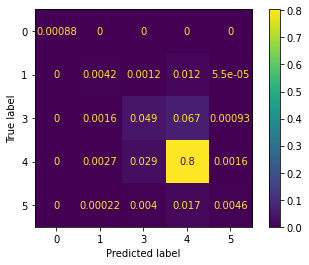

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y, y_res, normalize='all')
cmd = ConfusionMatrixDisplay(cm, display_labels=['0','1','3','4','5'])
cmd.plot()

In [ ]:
from sklearn.metrics import classification_report
display_labels=['0','1','3','4','5']
print(classification_report(y, y_res, target_names=display_labels))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.48      0.24      0.32       323
           3       0.59      0.42      0.49      2166
           4       0.89      0.96      0.93     15231
           5       0.64      0.18      0.28       472

    accuracy                           0.86     18208
   macro avg       0.72      0.56      0.60     18208
weighted avg       0.84      0.86      0.85     18208



In [ ]:
y_pred=knn.predict_proba(X_test)

ValueError: ignored

In [ ]:
y_pred

array([[0. , 0. , 0.2, 0.6, 0.2],
       [0. , 0. , 0.2, 0.8, 0. ],
       [0. , 0. , 0. , 1. , 0. ],
       ...,
       [0. , 0. , 0. , 1. , 0. ],
       [0. , 0. , 0. , 0.8, 0.2],
       [0. , 0. , 0.2, 0.8, 0. ]])

In [ ]:
import pandas as pd 
import numpy as np
 

In [ ]:

submission_df=pd.DataFrame(y_pred)

In [ ]:
submission_df

,0,1,2,3,4
0,0.0,0.2,0.2,0.6,0.0
1,0.0,0.2,0.2,0.6,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.2,0.8,0.0
4,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...
12135,0.0,0.0,0.0,1.0,0.0
12136,0.0,0.0,0.0,1.0,0.0
12137,0.0,0.0,0.0,1.0,0.0
12138,0.0,0.0,0.0,1.0,0.0


In [ ]:
submission_df.to_csv('foo.csv', index=True)

In [ ]:
files.download('submission_df.csv')

FileNotFoundError: ignored